Import data

In [3]:
import pandas as pd

fortune_bay_df = pd.read_csv("../Datasets/Fortune_Bay.csv")
fortune_bay_df.head()

,station_name,time,longitude,latitude,wind_spd_avg,wind_spd_max,wind_dir_avg,air_temp_avg,air_pressure_avg,air_humidity_avg,air_dewpoint_avg,surface_temp_avg,wave_ht_max,wave_ht_sig,wave_period_max,wave_dir_avg,wave_spread_avg,curr_spd_avg,curr_dir_avg
0,NaN,UTC,degrees_east,degrees_north,m s-1,m s-1,degree,degree_C,mbar,1.0,degree_C,degree_C,m,m,s,degree,degree,mm s-1,degree
1,smb_fortune_bay,2019-06-26T17:23:41Z,-53.13566833,47.388615,0.7,1.8,21,45.2,1025.3,NaN,NaN,NaN,0.0,0.0,28.6,217,74,NaN,NaN
2,smb_fortune_bay,2019-06-26T17:53:41Z,-53.135645,47.38856667,1.1,3.4,36,43.8,1025.3,NaN,NaN,NaN,0.0,0.0,28.6,90,78,NaN,NaN
3,smb_fortune_bay,2019-06-26T18:23:41Z,-53.13560333,47.38860667,1.1,2.4,31,43.0,1025.5,NaN,NaN,14.9,0.0,0.0,28.6,195,75,2758.3,304.8
4,smb_fortune_bay,2019-06-26T18:53:41Z,-53.135645,47.38869667,1.2,2.7,38,47.8,1025.7,NaN,NaN,14.7,0.0,0.0,28.6,10,72,1638.3,307.3


1. Handle Missing Values

In [6]:
# N/A or missing values
print(fortune_bay_df.isnull().sum())
#fortune_bay_df.isna

station_name           1
time                   0
longitude           2141
latitude            2141
wind_spd_avg         126
wind_spd_max         126
wind_dir_avg         126
air_temp_avg        4518
air_pressure_avg     107
air_humidity_avg    7394
air_dewpoint_avg    7408
surface_temp_avg    1526
wave_ht_max          111
wave_ht_sig          111
wave_period_max      111
wave_dir_avg         111
wave_spread_avg      111
curr_spd_avg        1532
curr_dir_avg        1532
dtype: int64


In [8]:
# Data is collected from a single buoy/sensor
fortune_bay_df.station_name.unique()

array([nan, 'smb_fortune_bay'], dtype=object)

In [14]:
fortune_bay_df.iloc[1].time

'2019-06-26T17:23:41Z'

How to handle missing values?

Of course an option is to delete the rows with missing values but in situations like this example, that would mean losing a lot of valuable data and reducing the reliability of our conclusions.

A common solution is the fill them with the average (mean),
middle (median) or most frequent (mode) value for that column. This method is an example of what is  called *Imputation* which is the process of replacing missing data with substituted values.

Deciding how to handle missing values requires a bit of understanding the dataset and what could make the most sense to be there and introduce the least amount of bias.

Since the data collected is from a single sensor, it's unlikely to have moved a large amount between measurements. The location values longitude and latitude can be set to their most frequent value (mode). 

Since our data is based on weather, the measurements are taken at 30 minute intervals so we can assume that a large change in conditions occuring is unlikely. This means we can set missing values of this type to the value immediately preceeding it.




In [43]:
# Replace location values with mode
fortune_bay_df['longitude'] = fortune_bay_df['longitude'].fillna(fortune_bay_df['longitude'].mode()[0])
fortune_bay_df['latitude'] = fortune_bay_df['latitude'].fillna(fortune_bay_df['latitude'].mode()[0])
fortune_bay_df[['longitude', 'latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [45]:
# Replace the rest of the environment variables with the previous valid value
# ffill: propagate last valid observation forward to next valid.
fortune_bay_df = fortune_bay_df.fillna(method='ffill')

In [48]:
# Only value left is the first desc column
print(fortune_bay_df.isnull().sum())

station_name        1
time                0
longitude           0
latitude            0
wind_spd_avg        0
wind_spd_max        0
wind_dir_avg        0
air_temp_avg        0
air_pressure_avg    0
air_humidity_avg    0
air_dewpoint_avg    0
surface_temp_avg    0
wave_ht_max         0
wave_ht_sig         0
wave_period_max     0
wave_dir_avg        0
wave_spread_avg     0
curr_spd_avg        0
curr_dir_avg        0
dtype: int64


In [79]:
desc_row = fortune_bay_df.iloc[0]
fortune_bay_df = fortune_bay_df.iloc[1:]
fortune_bay_df.head()

,station_name,time,longitude,latitude,wind_spd_avg,wind_spd_max,wind_dir_avg,air_temp_avg,air_pressure_avg,air_humidity_avg,air_dewpoint_avg,surface_temp_avg,wave_ht_max,wave_ht_sig,wave_period_max,wave_dir_avg,wave_spread_avg,curr_spd_avg,curr_dir_avg
1,smb_fortune_bay,2019-06-26T17:23:41Z,-53.13566833,47.388615,0.7,1.8,21,45.2,1025.3,1.0,degree_C,degree_C,0.0,0.0,28.6,217,74,mm s-1,degree
2,smb_fortune_bay,2019-06-26T17:53:41Z,-53.135645,47.38856667,1.1,3.4,36,43.8,1025.3,1.0,degree_C,degree_C,0.0,0.0,28.6,90,78,mm s-1,degree
3,smb_fortune_bay,2019-06-26T18:23:41Z,-53.13560333,47.38860667,1.1,2.4,31,43.0,1025.5,1.0,degree_C,14.9,0.0,0.0,28.6,195,75,2758.3,304.8
4,smb_fortune_bay,2019-06-26T18:53:41Z,-53.135645,47.38869667,1.2,2.7,38,47.8,1025.7,1.0,degree_C,14.7,0.0,0.0,28.6,10,72,1638.3,307.3
5,smb_fortune_bay,2019-06-26T19:23:41Z,-53.13563667,47.38868,0.8,2.0,29,45.8,1025.7,1.0,degree_C,14.5,0.0,0.0,28.6,52,72,2228.3,316.4


2. Handle Outliers

In [68]:
print(len(fortune_bay_df.columns))
print(fortune_bay_df.iloc[1:].count(axis='columns'))

19
1        19
2        19
3        19
4        19
5        19
         ..
13854    19
13855    19
13856    19
13857    19
13858    19
Length: 13858, dtype: int64


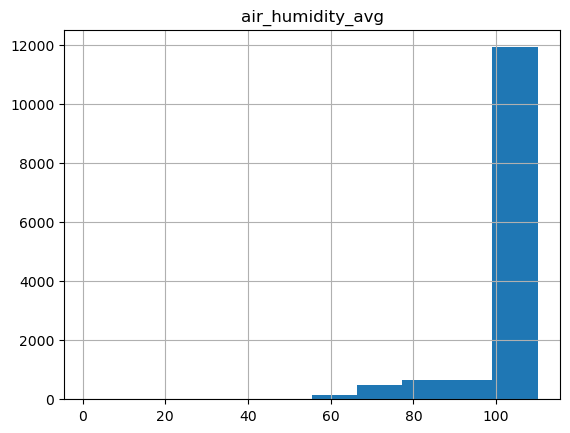

In [80]:
fortune_bay_df[1:].hist()
plt.show()

In [88]:
fortune_bay_df['air_temp_avg'].hist()

0

ValueError: The number of passed axes must be 1, the same as the output plot

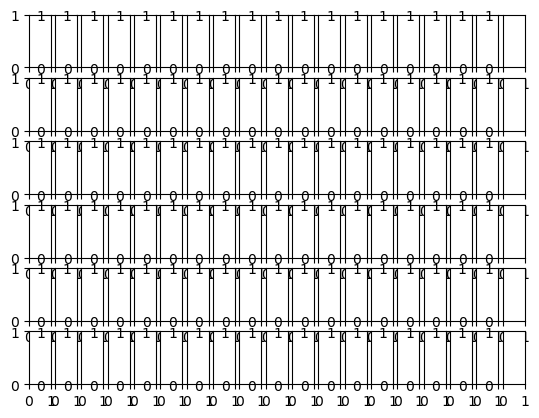

In [70]:
import matplotlib.pyplot as plt
# Checking the distribution of data using histograms
columns = len(fortune_bay_df.columns)
rows = columns // 3

fig, axis = plt.subplots(rows, columns)
fortune_bay_df.iloc[1:].hist(ax=axis)

3. Feature Extraction

4. Feature Selection